<a href="https://colab.research.google.com/github/VISHALGAURAV95/Analyzing-the-Housing-Dataset---Assignment1/blob/main/AnalyzingtheHousingDataset_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the housing price data into a Pandas DataFrame
housing_data = pd.read_csv("housing.csv")

# Task 1: Relationship between air conditioning and preferred area
# Chi-square test for independence
contingency_table = pd.crosstab(housing_data['airco'], housing_data['prefarea'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-square Statistic:", chi2)
print("p-value:", p)
if p < 0.05:
    print("There is a significant relationship between air conditioning and preferred area.")
else:
    print("There is no significant relationship between air conditioning and preferred area.")

Chi-square Statistic: 6.7248074959815565
p-value: 0.00950809923138478
There is a significant relationship between air conditioning and preferred area.


In [3]:
driveway_lotsize = housing_data.groupby('driveway')['lotsize']
t_stat, p_value = ttest_ind(driveway_lotsize.get_group('yes'), driveway_lotsize.get_group('no'))
print("t-statistic:", t_stat)
print("p-value:", p_value)
if p_value < 0.05:
    print("There is a significant relationship between lot size and driveway type.")
else:
    print("There is no significant relationship between lot size and driveway type.")


t-statistic: 7.035119800023687
p-value: 6.010487945851575e-12
There is a significant relationship between lot size and driveway type.


R-squared: 0.4568536416087623


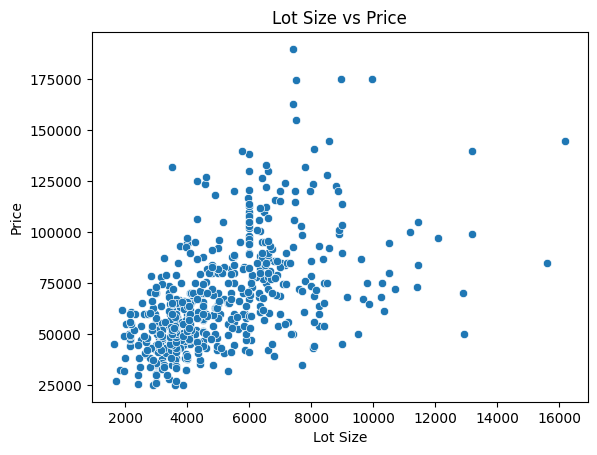

In [4]:
# Task 3: Linear regression model with price as dependent variable
# Preprocess data
X = housing_data[['lotsize', 'bedrooms', 'bathrms']]
y = housing_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

# Visualize the relationship between lot size and price
sns.scatterplot(x=housing_data['lotsize'], y=housing_data['price'])
plt.xlabel("Lot Size")
plt.ylabel("Price")
plt.title("Lot Size vs Price")
plt.show()